In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import os
import random
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Model
from tensorflow.keras import optimizers,applications,callbacks

In [4]:
#Training and Validation Generator
batch_size = 32;
batch_size_val = 2;
datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Colab Notebooks/Organized Dataset/Train',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='categorical',
        seed = 103)

validation_generator = datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Colab Notebooks/Organized Dataset/Validation',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=batch_size_val,
        class_mode='categorical',
        seed = 103)

Found 9424 images belonging to 2 classes.
Found 2020 images belonging to 2 classes.


In [5]:
num_classes = 2;

Model: ResNet-101


In [6]:
model = applications.ResNet101(include_top=True,weights="imagenet")

179658752/179648224 [==============================] - 1s 0us/step


In [7]:
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Model
# make a reference to VGG's input layer
inp = model.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(model.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [8]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

opt = optimizers.SGD(learning_rate=20)
model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
callback = callbacks.EarlyStopping(monitor='loss', patience=4)
callbacks=[callback]

In [10]:
import time
start = time.time()
history2 = model_new.fit(train_generator, 
                         steps_per_epoch = 295,
                         epochs=25,
                         validation_data=validation_generator,
                         validation_steps=1010,
                         verbose = 1,
                         callbacks = callbacks
                        )
end = time.time()

Epoch 1/25
295/295 [==============================] - 2238s 8s/step - loss: 3052.0498 - accuracy: 0.4981 - val_loss: 1302.3552 - val_accuracy: 0.5000
Epoch 2/25
295/295 [==============================] - 72s 244ms/step - loss: 2633.3660 - accuracy: 0.5238 - val_loss: 519.1085 - val_accuracy: 0.5272
Epoch 3/25
295/295 [==============================] - 72s 243ms/step - loss: 2516.2859 - accuracy: 0.5237 - val_loss: 1396.0492 - val_accuracy: 0.5000
Epoch 4/25
295/295 [==============================] - 72s 243ms/step - loss: 2306.6826 - accuracy: 0.5322 - val_loss: 354.6211 - val_accuracy: 0.6124
Epoch 5/25
295/295 [==============================] - 71s 239ms/step - loss: 1963.4736 - accuracy: 0.5597 - val_loss: 390.4710 - val_accuracy: 0.7931
Epoch 6/25
295/295 [==============================] - 71s 242ms/step - loss: 1916.6409 - accuracy: 0.5593 - val_loss: 1946.3827 - val_accuracy: 0.5129
Epoch 7/25
295/295 [==============================] - 71s 240ms/step - loss: 1607.6528 - accuracy:

In [11]:
time_taken = end - start
time_taken

3965.833169937134

In [12]:
test_generator = datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Colab Notebooks/Organized Dataset/Test',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=1,
        class_mode='categorical',
        shuffle = False)

Found 2020 images belonging to 2 classes.


In [13]:
loss, accuracy = model_new.evaluate(test_generator, verbose=0,steps = 2020)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2152.443359375
Test accuracy: 0.5049505233764648


In [14]:
import sklearn.metrics
y_pred = model_new.predict(test_generator)
y_pred = np.float32((y_pred<0.5))

In [15]:
y_pred_single = y_pred[:,0];

In [16]:
y_test_single = test_generator.classes;
y_pred_single = y_pred[:,0];
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_single,y_pred_single)

In [17]:
y_test_single

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

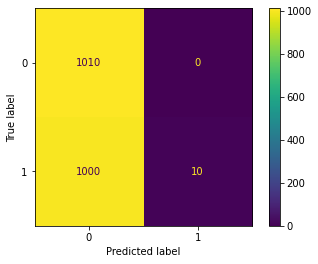

In [18]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
...    y_test_single, y_pred_single)

In [19]:
len(y_pred)

2020

In [20]:
sklearn.metrics.f1_score(
...    y_test_single, y_pred_single)

0.0196078431372549

In [ ]:
history2.history

{'loss': [2882.23291015625,
  2754.494873046875,
  2483.892578125,
  2241.82373046875,
  2045.5806884765625,
  1751.4493408203125,
  1729.8529052734375,
  1615.5849609375,
  1543.818359375,
  1475.8699951171875,
  1285.29345703125,
  1481.0579833984375,
  1184.426513671875,
  1020.4132080078125,
  1246.1949462890625,
  1132.38916015625,
  1163.276123046875,
  1052.17919921875],
 'accuracy': [0.5139006972312927,
  0.512627363204956,
  0.5215407609939575,
  0.5386247634887695,
  0.553162157535553,
  0.5725806355476379,
  0.5759762525558472,
  0.5969864130020142,
  0.5966680645942688,
  0.6087648272514343,
  0.635929524898529,
  0.6002758741378784,
  0.6500424742698669,
  0.6714770793914795,
  0.6346561908721924,
  0.6541808247566223,
  0.646116316318512,
  0.6629881262779236],
 'val_loss': [1588.8751220703125,
  4597.52587890625,
  1640.7982177734375,
  844.8167724609375,
  2894.05810546875,
  1703.9393310546875,
  1865.9876708984375,
  3016.825927734375,
  1180.7069091796875,
  1583.073

{'loss': [2882.23291015625,
  2754.494873046875,
  2483.892578125,
  2241.82373046875,
  2045.5806884765625,
  1751.4493408203125,
  1729.8529052734375,
  1615.5849609375,
  1543.818359375,
  1475.8699951171875,
  1285.29345703125,
  1481.0579833984375,
  1184.426513671875,
  1020.4132080078125,
  1246.1949462890625,
  1132.38916015625,
  1163.276123046875,
  1052.17919921875],
 'accuracy': [0.5139006972312927,
  0.512627363204956,
  0.5215407609939575,
  0.5386247634887695,
  0.553162157535553,
  0.5725806355476379,
  0.5759762525558472,
  0.5969864130020142,
  0.5966680645942688,
  0.6087648272514343,
  0.635929524898529,
  0.6002758741378784,
  0.6500424742698669,
  0.6714770793914795,
  0.6346561908721924,
  0.6541808247566223,
  0.646116316318512,
  0.6629881262779236],
 'val_loss': [1588.8751220703125,
  4597.52587890625,
  1640.7982177734375,
  844.8167724609375,
  2894.05810546875,
  1703.9393310546875,
  1865.9876708984375,
  3016.825927734375,
  1180.7069091796875,
  1583.073